- Dataframe creation of the table players in the silver DB that contains the entire historical data, using Spark

In [0]:
ranking_df = spark.table('silver.players')

- Transform the date type to 'MMM/yyyy'

In [0]:
from pyspark.sql.functions import to_date

# Transform rating_date to date
ranking_df = ranking_df.withColumn('rating_date', to_date(ranking_df.rating_date, 'MMM/yyyy'))

- Ranking federations by month according to the average rating of the top 10 players

In [0]:
from pyspark.sql import Window
from pyspark.sql import functions as F

# Filter the rows where the rating is not 0 or not null and flag is not inactive
filtered_df = ranking_df.filter(
    (ranking_df.rating != 0) & (ranking_df.rating.isNotNull()) & (ranking_df.flag != 'wi') & (ranking_df.flag != 'i') 
)

# Define a window specification to partition by country and month, and order by rating in descending order
window_spec = Window.partitionBy('country', 'rating_date').orderBy(F.desc('rating'))

# Add a rank column within each partition
ranked_df = filtered_df.withColumn('rank', F.row_number().over(window_spec))

# Filter to keep only the top 10 players by country and month
top_10_df = ranked_df.filter(ranked_df.rank <= 10)

# Group by country and month and calculate the average rating of the top 10 players
average_rating_by_country_month = top_10_df.groupBy('country', 'rating_date').agg(
    F.avg('rating').alias('average_rating')
)

# Add a rank column for the grouping by country and month
window_spec_country = Window.partitionBy('rating_date').orderBy(F.desc('average_rating'))
average_rating_by_country_month = average_rating_by_country_month.withColumn(
    'rank', F.row_number().over(window_spec_country)
)

# Order by month (most recent to oldest) and average rating, and round the average to one decimal place
average_rating_by_country_month = average_rating_by_country_month.orderBy(
    F.desc('rating_date'), 
    F.desc('average_rating')
).withColumn('average_rating', F.round('average_rating', 1))

# Display the result
display(average_rating_by_country_month)


country,rating_date,average_rating,rank
CHN,2024-07-01,2483.8,1
IND,2024-07-01,2420.5,2
UKR,2024-07-01,2389.9,3
POL,2024-07-01,2378.1,4
RUS,2024-07-01,2377.4,5
GEO,2024-07-01,2370.8,6
FID,2024-07-01,2358.7,7
FRA,2024-07-01,2348.4,8
GER,2024-07-01,2345.7,9
USA,2024-07-01,2345.5,10


In [0]:
average_rating_by_country_month.write.mode('overwrite').saveAsTable('gold.mix_fed_rank_evolution')

- Showing the ranking evolution of India

In [0]:
# Filtering just country = 'IND'
average_rating_india = average_rating_by_country_month.filter(average_rating_by_country_month.country == 'IND')

display(average_rating_india)

country,rating_date,average_rating,rank
IND,2024-07-01,2420.5,2
IND,2024-06-01,2420.0,2
IND,2024-05-01,2421.7,2
IND,2024-04-01,2418.1,2
IND,2024-03-01,2422.2,2
IND,2024-02-01,2428.3,2
IND,2024-01-01,2427.0,2
IND,2023-12-01,2429.1,2
IND,2023-11-01,2428.3,2
IND,2023-10-01,2426.8,2


Databricks visualization. Run in Databricks to view.

In [0]:
average_rating_india.write.mode('overwrite').saveAsTable('gold.mix_IND_rank_evolution')

In [0]:
from pyspark.sql.functions import date_format

average_rating_india = average_rating_india.withColumn('rating_date', date_format('rating_date', 'MMM/yyyy'))
display(average_rating_india)

Databricks visualization. Run in Databricks to view.

country,rating_date,average_rating,rank
IND,Jul/2024,2420.5,2
IND,Jun/2024,2420.0,2
IND,May/2024,2421.7,2
IND,Apr/2024,2418.1,2
IND,Mar/2024,2422.2,2
IND,Feb/2024,2428.3,2
IND,Jan/2024,2427.0,2
IND,Dec/2023,2429.1,2
IND,Nov/2023,2428.3,2
IND,Oct/2023,2426.8,2


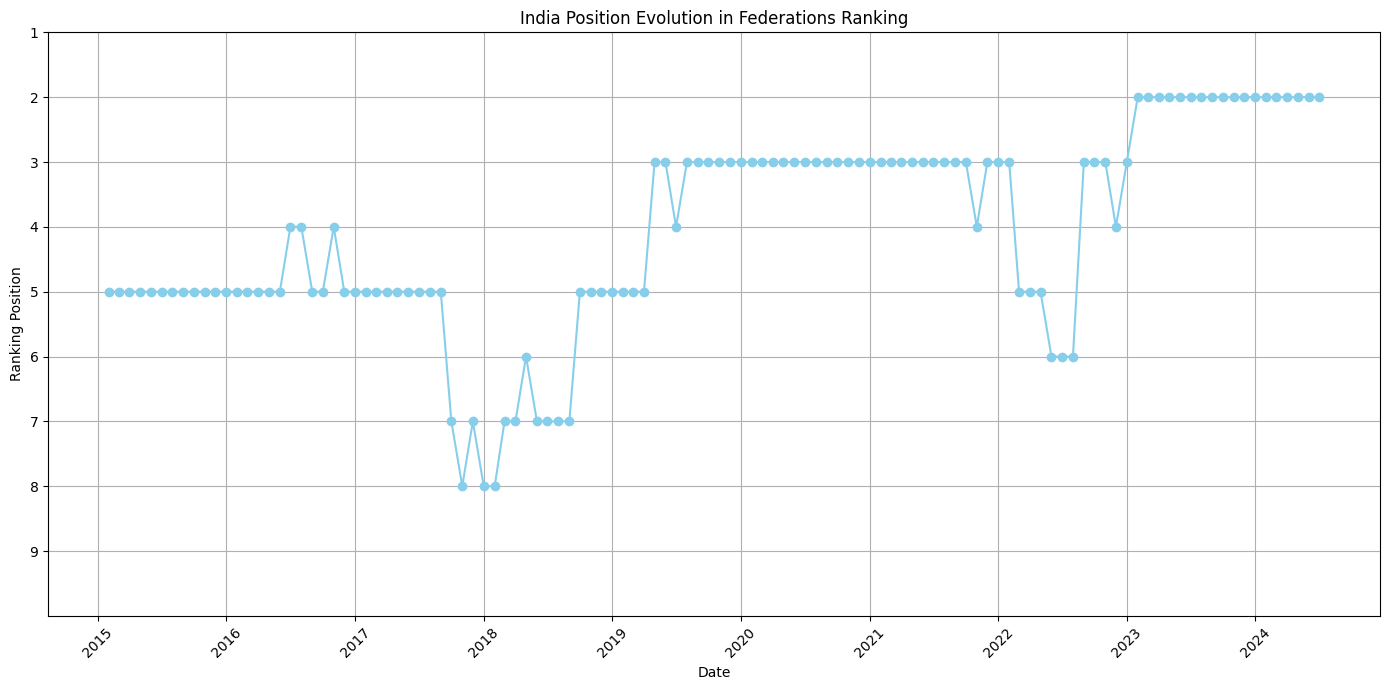

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import to_date

average_rating_india2 = average_rating_india.withColumn('rating_date', to_date('rating_date', 'MMM/yyyy'))

# Convert DataFrame Spark to Pandas DataFrame
df_pandas = average_rating_india2.toPandas()

# Order data per date
df_pandas = df_pandas.sort_values(by='rating_date')

# Data plot
plt.figure(figsize=(14, 7))
plt.plot(df_pandas['rating_date'], df_pandas['rank'], marker='o', linestyle='-', color='skyblue')
plt.title('India Position Evolution in Federations Ranking')
plt.xlabel('Date')
plt.ylabel('Ranking Position')

# Better view of date in the X axis
plt.xticks(rotation=45)

# Invert Y axis
plt.gca().invert_yaxis()
plt.ylim(10, 1)
plt.yticks(range(1, 10))
plt.grid(True)
plt.tight_layout()

plt.show()